<a href="https://colab.research.google.com/github/nandukamankar/regression-analysis/blob/main/Copy_of_regression_analysis_on_rossmann_store_sales_by_nandu_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **PROJECT TITLE :- Sales Prediction -> Predicting the sales of Rossmann Store Chain.**

# Project Type :- Capstone Project - Regression 

**Contribution :- Team**

Team Member 1 :- Deepak Singh

Team Member 2 :- Nandu Kamankar

# **PROJECT SUMMARY :-**

The goal of this project is to develop a sales forecasting model for Rossmann, a leading drugstore chain operating over 3,000 stores across 7 European countries. Currently, the store managers are responsible for predicting their daily sales for up to six weeks in advance. However, the accuracy of these predictions varies due to the multitude of factors that influence store sales, such as promotions, competition, holidays, seasonality, and locality.

To address this challenge, historical sales data from 1,115 Rossmann stores has been provided. This dataset includes information about daily sales as well as other relevant features. It is worth noting that some stores in the dataset were temporarily closed for refurbishment, adding an additional complexity to the task.

The main objective is to forecast the "Sales" column for the test set, leveraging the historical sales data and associated factors. By developing an accurate and reliable sales forecasting model, Rossmann aims to improve operational efficiency, optimize inventory management, and enhance decision-making at both the store and corporate levels.

This project presents an opportunity to employ advanced data analysis and machine learning techniques to extract meaningful insights from the data and develop a robust forecasting model. The model will enable Rossmann to anticipate future sales patterns, better understand the impact of various factors on sales, and make informed business decisions to drive growth and profitability.

By successfully predicting sales with higher accuracy, Rossmann can optimize its promotional strategies, inventory allocation, and resource planning. This will not only result in improved customer satisfaction but also contribute to increased revenue and market competitiveness in the highly dynamic retail industry.

# **GitHub Link :-** https://github.com/nandukamankar/regression-analysis

# **Problem Statement:-**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **Data Description:-**

Rossmann Stores Data.csv - Historical data including Sales

store.csv  - Supplemental information about the stores


**<u>Data fields</u>**

**Most of the fields are self-explanatory.**

* **Id** - an Id that represents a (Store, Date) duple within the set
*  **Store** - a unique Id for each store
*  **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##**Business Problem**
The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. 
 Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. 
 This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same. 

 Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

####Approach
* Business Problem
* Data Collection and Preprocessing
    
    1. Importing important libraries and modules
    2. Data Cleaning
    3.  Missing Data Handling
    4. Merging the Datasets
* Exploratory Data Analysis
    1. Hypotheses
    2. Categorical Features
    3. Continuous Features
    4. EDA Conclusion and Validating Hypotheses
* Feature Selection and Outlier Detection
    1. Feature Engineering
    2. Outlier Detection and Treatment
* Modeling
    1. Train Test Split
    2. Baseline Model - Decision Tree
    3. Random Forest Model
    4. Random Forest Hyperparameter Tuning
    5. Random Forest Feature Importance
* Model Performance and Evaluation
    1. Visualizing Model Performances
    2. Random Forest vs Baseline Model
    3. Random Forest Tuned vs Baseline and Random Forest Models
* Store wise Sales Predictions
* Conclusion and Recommendations


In [1]:
# Importing necessary libraries and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from scipy import stats
import warnings    
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Loading the dataset from the drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the csv file and converting it into pandas dataframes.

working_dir ='/content/drive/MyDrive/almabetter/project_work/REGRESSION PROJECT/'
file_name1 = 'Rossmann Stores Data.csv'
file_name2 = 'store.csv'
rossmann = pd.read_csv(working_dir+file_name1)
store = pd.read_csv(working_dir+file_name2)

# **DATA EXPLORATION**

**We have two Datasets.**

1. **Historical Sales Dataset :- rossmann**
2. **Stores Dataset :- store**

**First we look at the Historical Sales Dataset.**

In [4]:
# Looking at the first 5 Rows of the Historical Dataset.

rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Looking at the last 5 Rows of the Historical Dataset.

rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
# Checking the shape of the Historical Dataset.

rossmann.shape

(1017209, 9)

We have  total 10,17,209 Rows and 9 Columns is this dataset.

In [7]:
# Checking the information about the Historical Datset.

rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are total 1017209 rows/observations and 9 columns in this dataset.There seems to be no Null values present in it. It has integer, datetime and object as data types.

**Now we look at the Store Dataset:-**

In [8]:
# Looking at the first 5 Rows of the Store Dataset.

store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
# Looking at the last 5 Rows of the Store Dataset.

store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
# Checking the Shape of the Store Dataset.

store.shape

(1115, 10)

We have  total 1,115 Rows and 10 Columns is this dataset.

In [11]:
# Checking the information about the Store Dataset.

store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows/observations and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.

**HANDLING MISSING/NaN VALUES.**

In [12]:
# Analyzing the total missing values in the store dataset.

store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Out of 1115 entries there are missing values for the columns:
* CompetitionDistance - distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

* CompetitionOpenSinceMonth - gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* CompetitionOpenSinceYear -  gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.  

In [13]:
# define a function to find the number and percentage of missing values in a Store Dataset.

def get_missing_values_count_and_percentage(dataframe):
  num = 0
  for column in dataframe.columns:
    count = dataframe[column].isnull().sum()
    percentage = count/dataframe.shape[0]*100
    if percentage > 0:
      num += 1
      print(f"{column}: {count}({round(percentage, 2)})%")
  if num == 0:
    print("No missing values in the dataframe")

In [14]:
# Finding the number and percentage of missing values in Store dataset.

get_missing_values_count_and_percentage(store)

CompetitionDistance: 3(0.27)%
CompetitionOpenSinceMonth: 354(31.75)%
CompetitionOpenSinceYear: 354(31.75)%
Promo2SinceWeek: 544(48.79)%
Promo2SinceYear: 544(48.79)%
PromoInterval: 544(48.79)%


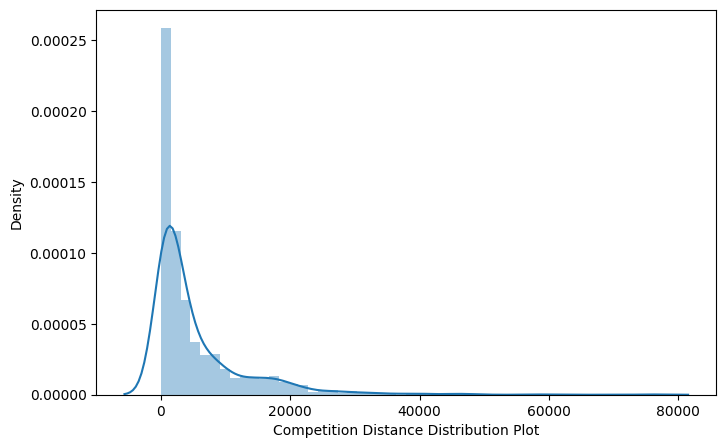

In [15]:
# Distrubution Plot for visualization of CompetitionDistance.

sns.distplot(x = store["CompetitionDistance"], hist = True)
plt.xlabel("Competition Distance Distribution Plot")
plt.show()

The distribution of CompetitionDistance is positively skewed. So it is safe to impute missing values with mode or median. Since the PDF of the peak of the distribution is very low, it is better to go with median instead of mode

In [16]:
# Filling competition distance with the median value.

store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

Both CompetitionOpenSinceMonth and CompetitionOpenSinceYear have the same number of missing values. This may mean that both the features have missing values in the same rows.

In [17]:
# Check if CompetitionOpenSinceMonth and CompetitionOpenSinceYear have missing values in the same rows

count = 0
for index, row in store.iterrows():
  if np.isnan(row["CompetitionOpenSinceMonth"]) and np.isnan(row["CompetitionOpenSinceYear"]):
    count += 1

print(count)

354


So, both the features have missing values in the same rows. Now lets check if its related to CompetitionDistance.

In [18]:
# Show CompetitionDistance, CompetitionOpenSinceMonth and CompetitionOpenSinceYear for rows
# where CompetitionOpenSinceMonth and CompetitionOpenSinceYear have missing values.

store[np.isnan(store["CompetitionOpenSinceMonth"])].loc[:, 
 ["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
11,1070.0,NaN,NaN
12,310.0,NaN,NaN
15,3270.0,NaN,NaN
18,3240.0,NaN,NaN
21,1040.0,NaN,NaN
...,...,...,...
1095,1130.0,NaN,NaN
1099,540.0,NaN,NaN
1112,9260.0,NaN,NaN
1113,870.0,NaN,NaN


Since no useful information was obtained from the above process, lets impute missing values with the most frequent values.

In [19]:
# Filling the missing values with mode.

store["CompetitionOpenSinceMonth"].fillna(value = store.CompetitionOpenSinceMonth.mode()[0], inplace=True)

store["CompetitionOpenSinceYear"].fillna(value = store.CompetitionOpenSinceYear.mode()[0], inplace=True)

Promo2SinceWeek, Promo2SinceYear and PromoInterval have the same number of missing values. This may mean that these features have missing values in the same rows.

In [20]:
# check if Promo2SinceWeek, Promo2SinceYear and PromoInterval have missing values in the same rows

count = 0
for index, row in store.iterrows():
  if np.isnan(row["Promo2SinceWeek"]) and np.isnan(row["Promo2SinceYear"]) and np.isnan(row["PromoInterval"]):
    count += 1

print(count)

544


So, these features have missing values in the same rows. Now lets check if its related to Promo2.

In [21]:
# Show Promo2, Promo2SinceWeek, Promo2SinceYear and PromoInterval for rows
# where Promo2SinceWeek, Promo2SinceYear and PromoInterval have missing values

store[np.isnan(store["Promo2SinceWeek"])].loc[:, ["Promo2", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]]

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,0,NaN,NaN,NaN
...,...,...,...,...
1107,0,NaN,NaN,NaN
1109,0,NaN,NaN,NaN
1111,0,NaN,NaN,NaN
1112,0,NaN,NaN,NaN


Promo2 value of head and tail of the above dataframe is 0. Lets check whether missing values in Promo2SinceWeek, Promo2SinceYear and PromoInterval is due to 0 in Promo2.

In [22]:
# Show the count of each unique value in Promo2.

store["Promo2"].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

So, missing values in Promo2SinceWeek, Promo2SinceYear and PromoInterval is due to 0 in Promo2. Lets impute missing values with 0.

In [23]:
# filling the missing values with value 0.

store["Promo2SinceWeek"].fillna(value = 0, inplace=True)

store["Promo2SinceYear"].fillna(value = 0, inplace=True)

store["PromoInterval"].fillna(value = 0, inplace=True)

Finally checking if any missing values left in Store Dataset.

In [24]:
# Finding the number and percentage of missing values in Store dataset.

get_missing_values_count_and_percentage(store)

No missing values in the dataframe


Since all the Dataset doesnot contain any missing values. Let's merge our two dataset to form a combine one Dataset.

In [25]:
# Merge the two datasets on Store data.

df = rossmann.merge(right=store, on="Store", how="left")

##Exploratory Data Analysis

Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. Exploring continuous as well as categorical variables and their influence on our dependent variable-'Sales'.


---



**Hypotheses:-**




Just by observing the head of the dataset and understanding the features involved in it,  the following hypotheses could be framed:

* There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.
* Customers would have a positive correlation with Sales.
* The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.
* Promotion should be having a positive correlation with Sales.
* Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.
* Stores are influenced by seasonality, probably before holidays sales would be high.

Next step is to explore and see in a data driven way about the factors influencing Rossmann stores sales and how.

**Categorical Features:-**

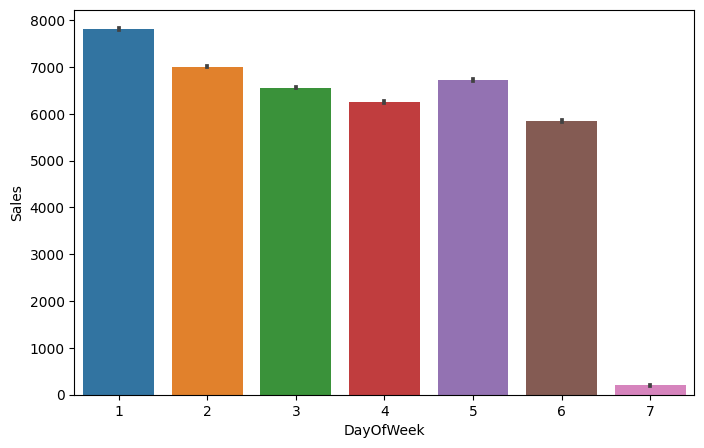

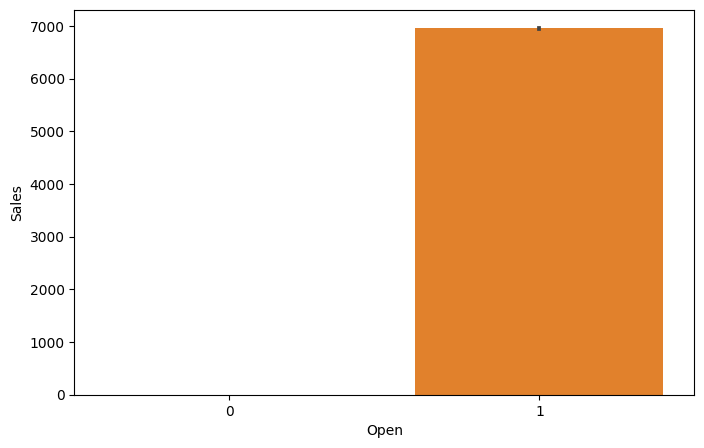

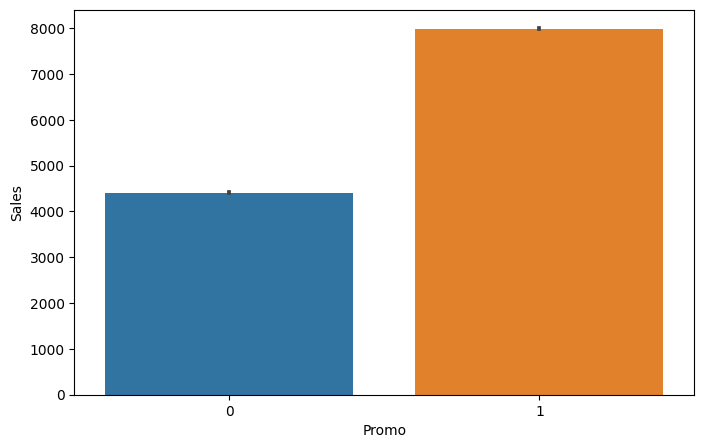

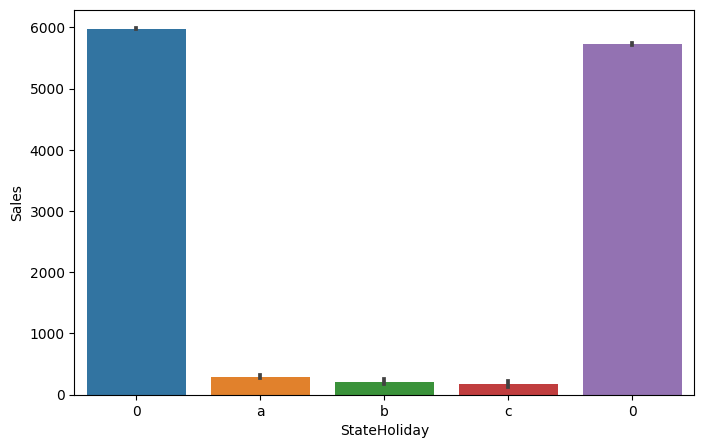

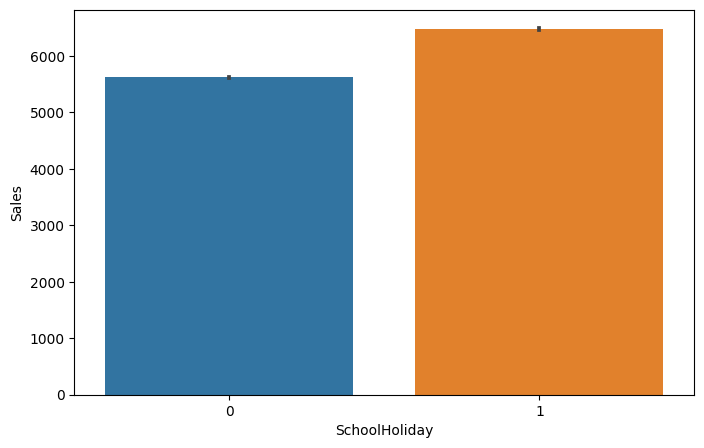

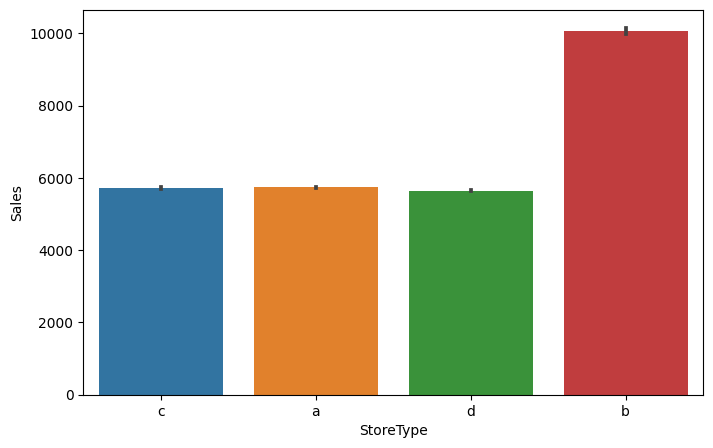

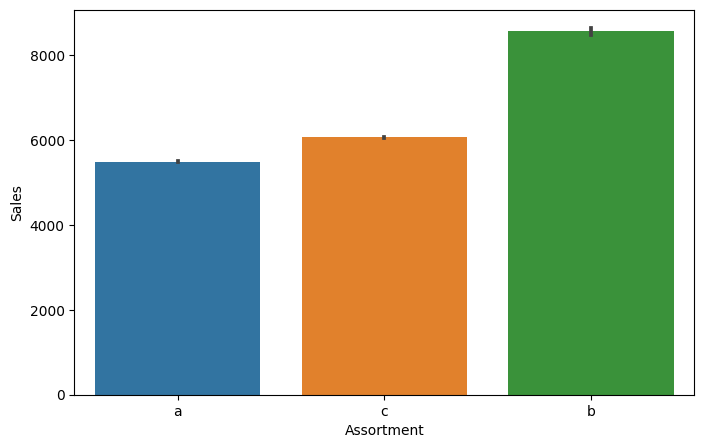

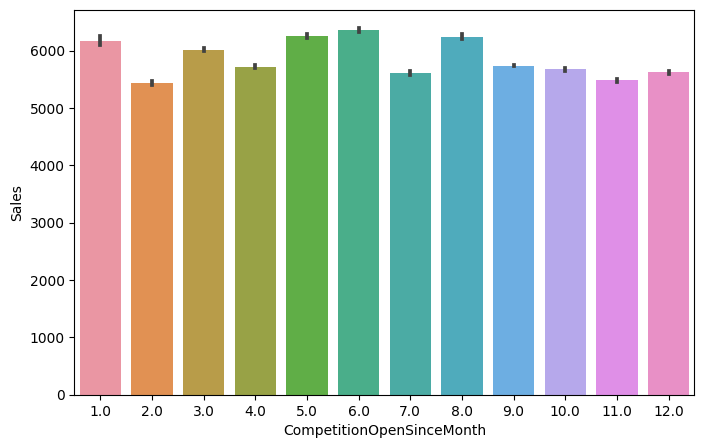

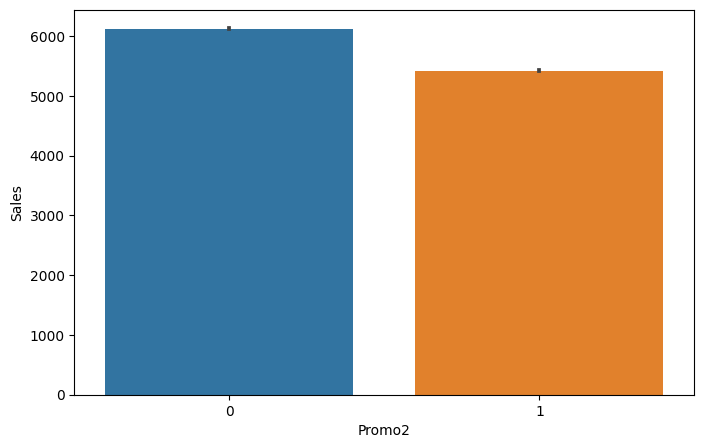

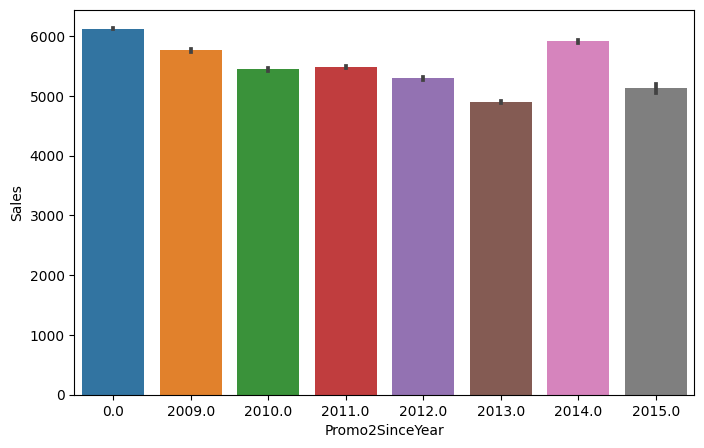

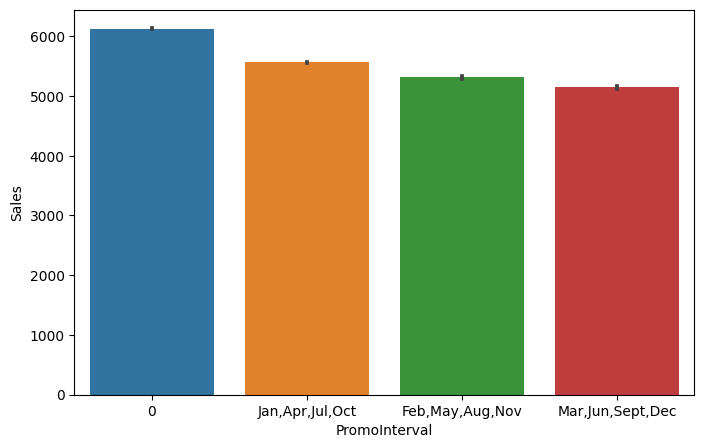

In [26]:
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales']) 
  plt.show()

####Observation:
*  There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
* On an average Store type B had the highest sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

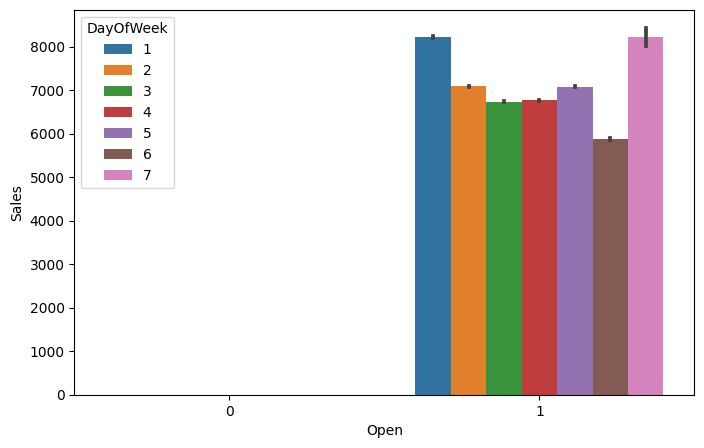

In [27]:
# Open and Storetype relationship.

#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays

sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])
plt.show()

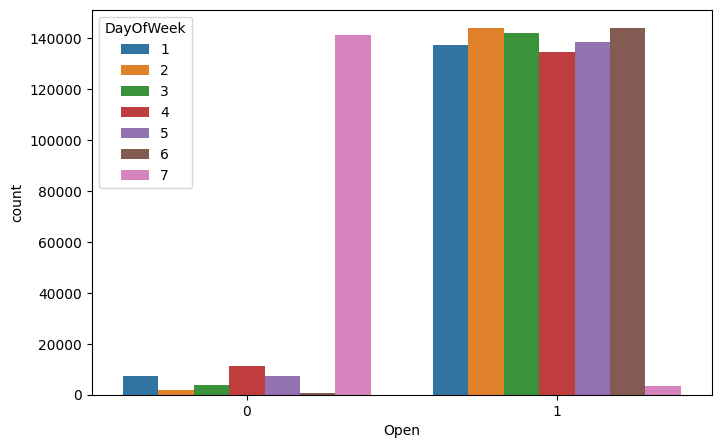

In [28]:
# Lets see open, how many shops are open on which days 
# and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday

sns.countplot(x=df["Open"], hue=df["DayOfWeek"])
plt.show()

####Observation:
This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays. 

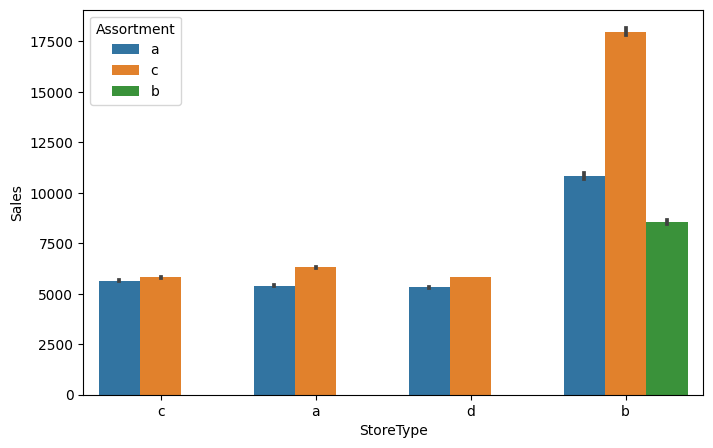

In [29]:
# Let's check the relationship between Store type, Assortment levels and Sales.

sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])
plt.show()

####Observation:
The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [30]:
#Store Type and Sales Exploration:-

store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()

# sorting into descending order to get higher values:-

store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True)
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


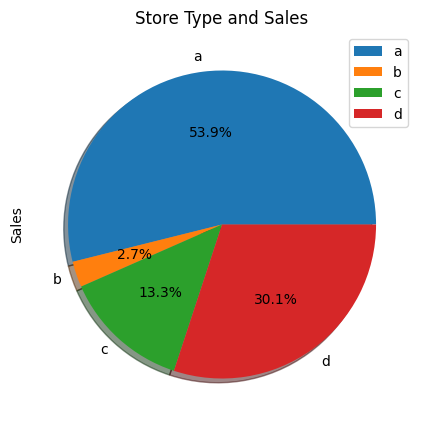

In [31]:
#let's now explore store type a bit and it's influence on sales, customers and all dataset:-

df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

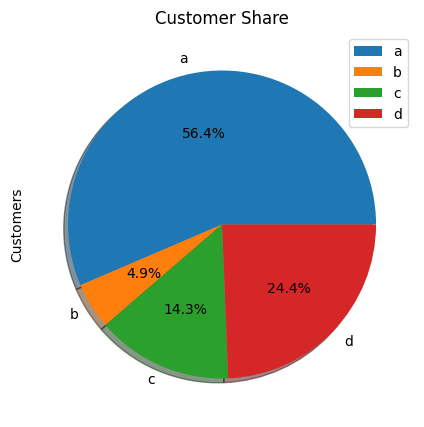

In [32]:
#customers and store type:- 

df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

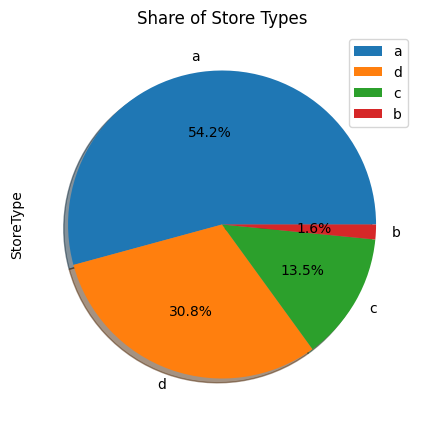

In [33]:
#store types in all of the dataset:-

df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

####Observation:
* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean. 
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.*italicised text*

**Continuous Features:-**

Sales with Time:-


In [34]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [35]:
# Converting the D type value of Date column into Date time:-

df['Date'] =  pd.to_datetime(df['Date'])

In [36]:
# Creating features from the date column.

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

In [37]:
# Checking the list of years in our dataset:-
years = df['Year'].unique()
years

array([2015, 2014, 2013])

In [38]:
#sales over the years:-

sales_df_2013 = df[df['Year'] == 2013]
sales_df_2014 = df[df['Year'] == 2014]
sales_df_2015 = df[df['Year'] == 2015]

In [39]:
#monthly sales:-

sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

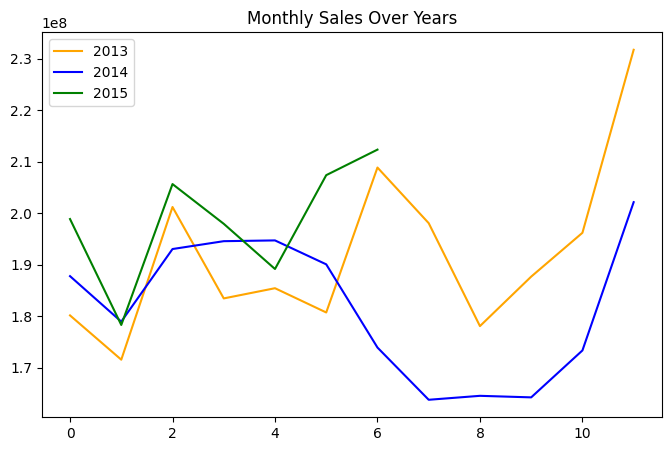

In [40]:
#plotting "Monthly Sales over Years":-

plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()
plt.show()

####Observation:-

* Sales rise up by the end of the year before the holidays. 
* Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

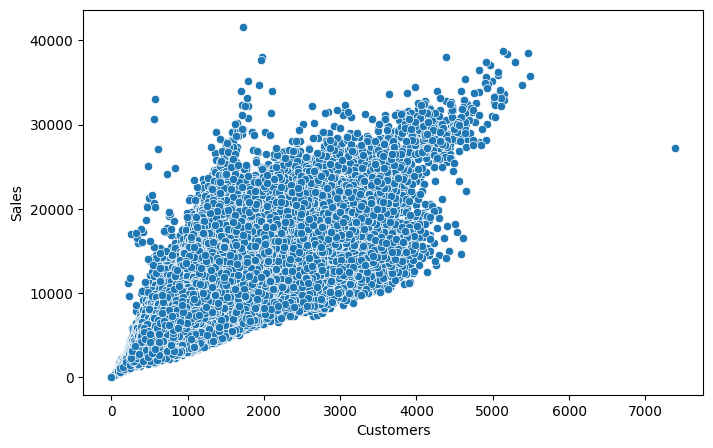

In [41]:
# Now plotting scatterplot of Customers and Sales:-

sns.scatterplot(x=df['Customers'], y=df['Sales'])
plt.show()

####Observation:-
* Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

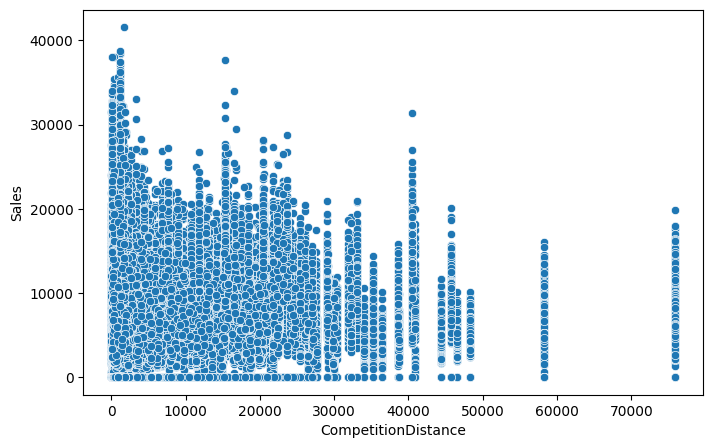

In [42]:
# Plotting scatterplot of Competition Distance and Sales:-

sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])
plt.show()

####Observation:-
* From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

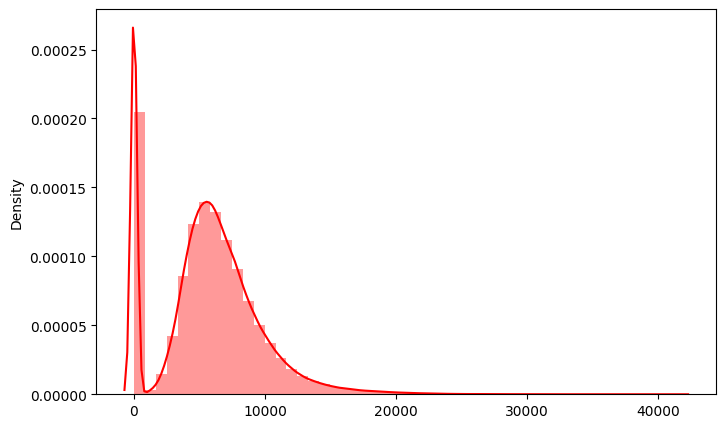

In [43]:
# Now plotting distribution plot of Sales:-

sns.distplot(x=df['Sales'], color = "red")
plt.show()

####Observation:
* The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

###Correlation Matrix:-
* Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

* By checking the correlation the factors affecting sales can be figured out.

In [44]:
# we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture:-

columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

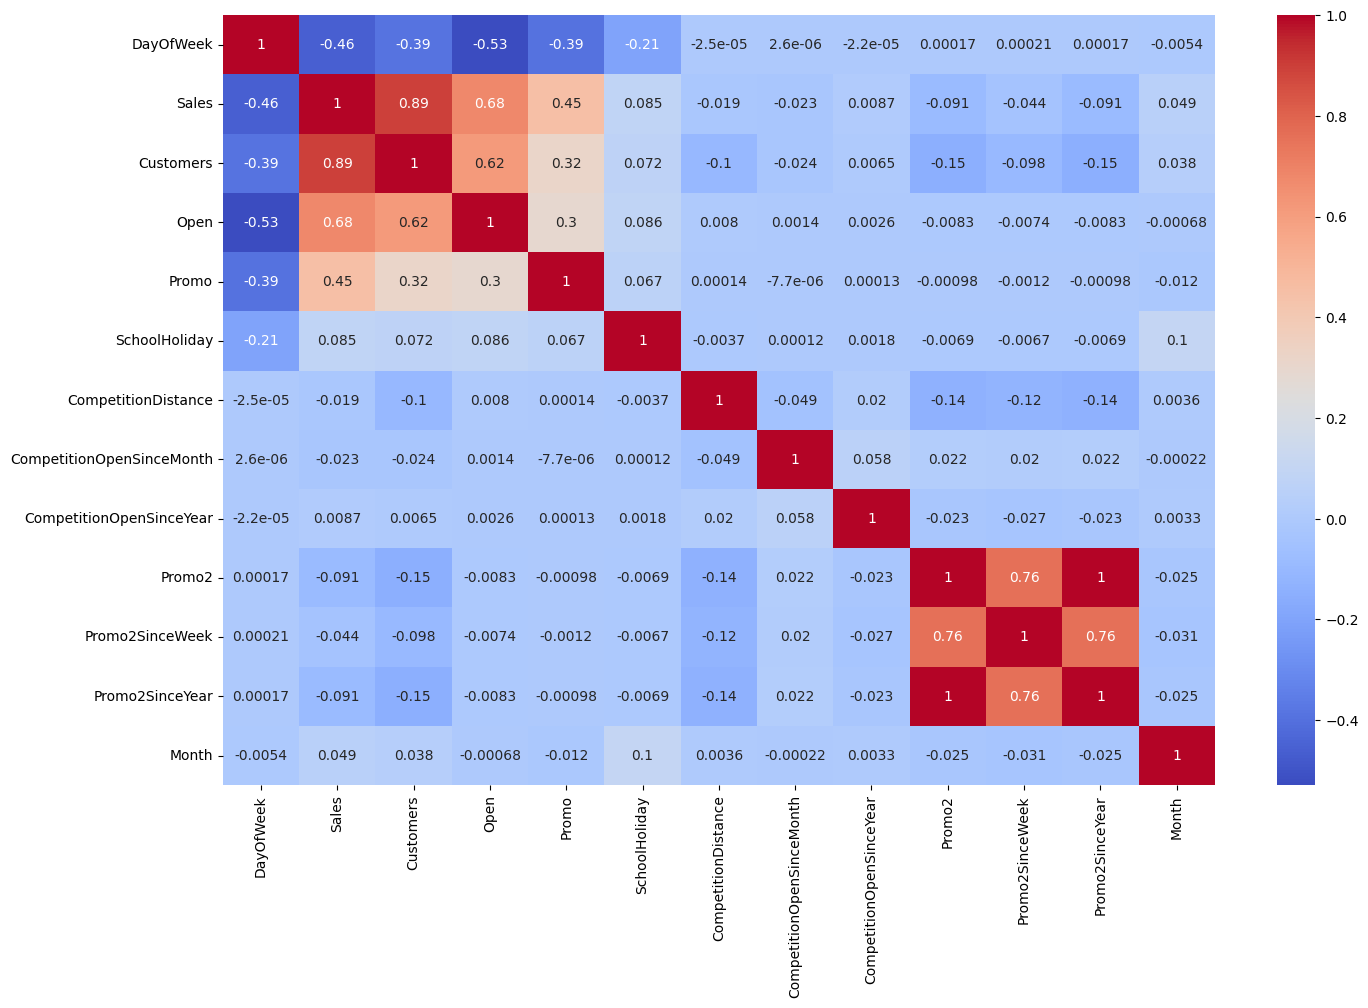

In [45]:
# Correlation heatmap:-

plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)
plt.show()

####Observation:-
* Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
* CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
* There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
* The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.


---



###EDA Conclusions and Hypotheses Validation:-
* There's a positive correlation between customers and sales which is explanatory.

* Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature. 

* The positive effect of promotion on Customers and Sales is observable. 
* It is clear that most of the stores remain closed during State and School Holidays. 
But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

* Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.
* Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others. 

* When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.
The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.

###Conclusion and Recommendations
**Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:
* there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

**Recommendations**
* More stores should be encouraged for promotion. 
* Store type B should be increased in number.
* There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.
